Class Distribution:
0    542
1     26
Name: diagnostic, dtype: int64
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       109
           1       1.00      0.80      0.89         5

    accuracy                           0.99       114
   macro avg       1.00      0.90      0.94       114
weighted avg       0.99      0.99      0.99       114



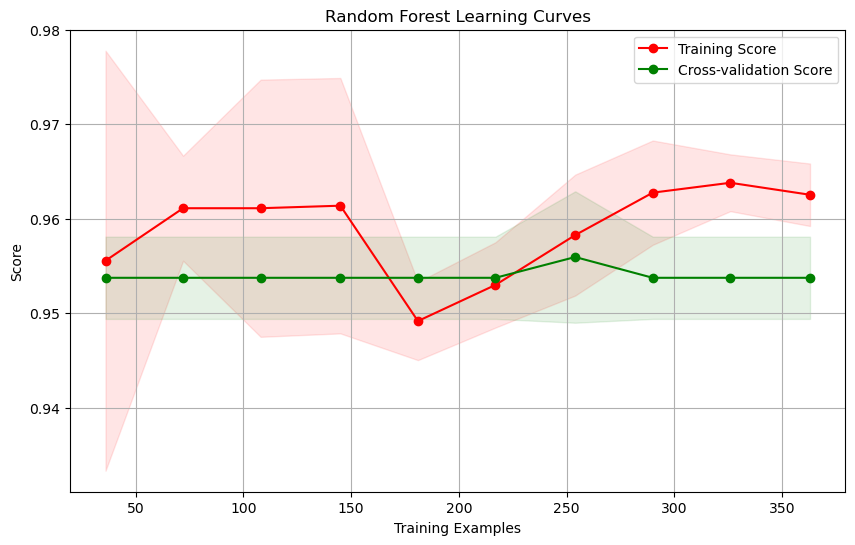

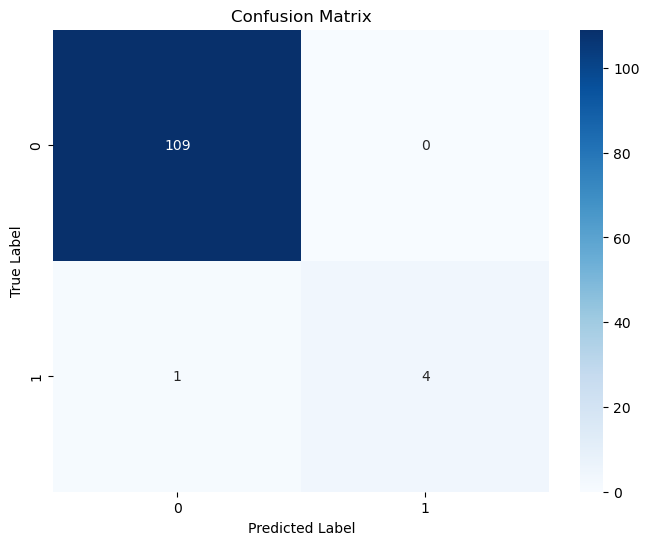

In [2]:
# random forest
import pandas as pd
import numpy as np
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV with the correct delimiter
data = pd.read_csv('C:/Users/jkgas/OneDrive/Documents/GitHub/G/for_classifier.csv', delimiter=';')

# Extract features and labels
X = data[['color_score', 'symmetry_score', 'blue_white_score']].values
y = data['diagnostic'].values  # Assuming 'diagnostic' column contains the class labels (0 or 1)

# Check class distribution
class_distribution = data['diagnostic'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58, stratify=y)

# Define the classifier pipeline (Random Forest Classifier) with best hyperparameters
classifier = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_leaf=2, min_samples_split=2)
)

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Calculate learning curves
train_sizes, train_scores, valid_scores = learning_curve(classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title("Random Forest Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation Score")

plt.legend(loc="best")

# Generate predictions
y_pred = classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

plt.show()

Class Distribution:
0    542
1     26
Name: diagnostic, dtype: int64
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       109
           1       1.00      0.80      0.89         5

    accuracy                           0.99       114
   macro avg       1.00      0.90      0.94       114
weighted avg       0.99      0.99      0.99       114



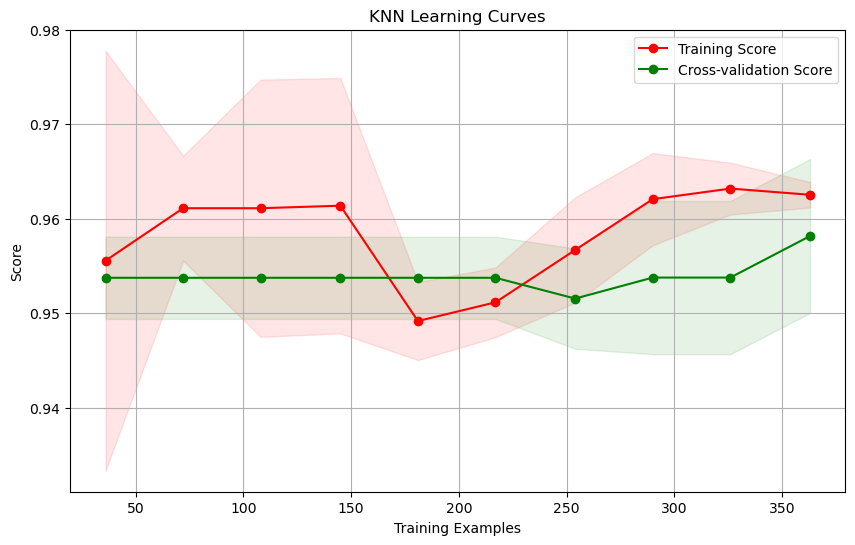

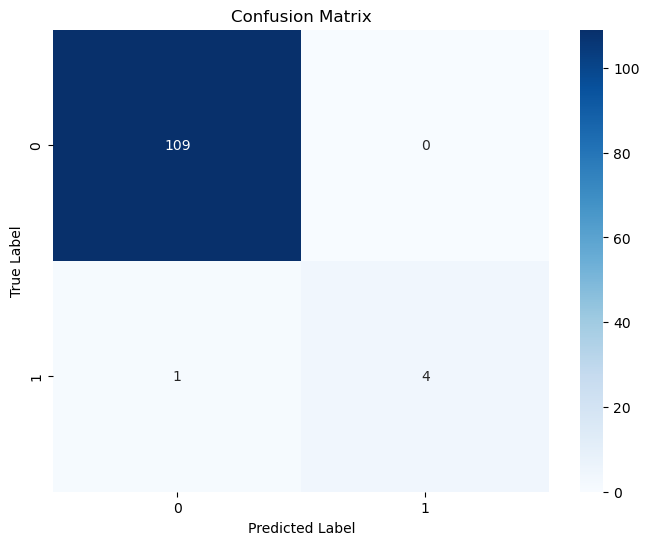

In [3]:
# KNN
import pandas as pd
import numpy as np
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV with the correct delimiter
data = pd.read_csv('C:/Users/jkgas/OneDrive/Documents/GitHub/G/for_classifier.csv', delimiter=';')

# Extract features and labels
X = data[['color_score', 'symmetry_score', 'blue_white_score']].values
y = data['diagnostic'].values  # Assuming 'diagnostic' column contains the class labels (0 or 1)

# Check class distribution
class_distribution = data['diagnostic'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58, stratify=y)

# Define the classifier pipeline (KNN) with best hyperparameters
classifier = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='manhattan')
)

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Calculate learning curves
train_sizes, train_scores, valid_scores = learning_curve(
    classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title("KNN Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(
    train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r"
)
plt.fill_between(
    train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g"
)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation Score")

plt.legend(loc="best")

# Generate predictions
y_pred = classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

plt.show()

Class Distribution:
0    542
1     26
Name: diagnostic, dtype: int64
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       109
           1       1.00      0.80      0.89         5

    accuracy                           0.99       114
   macro avg       1.00      0.90      0.94       114
weighted avg       0.99      0.99      0.99       114



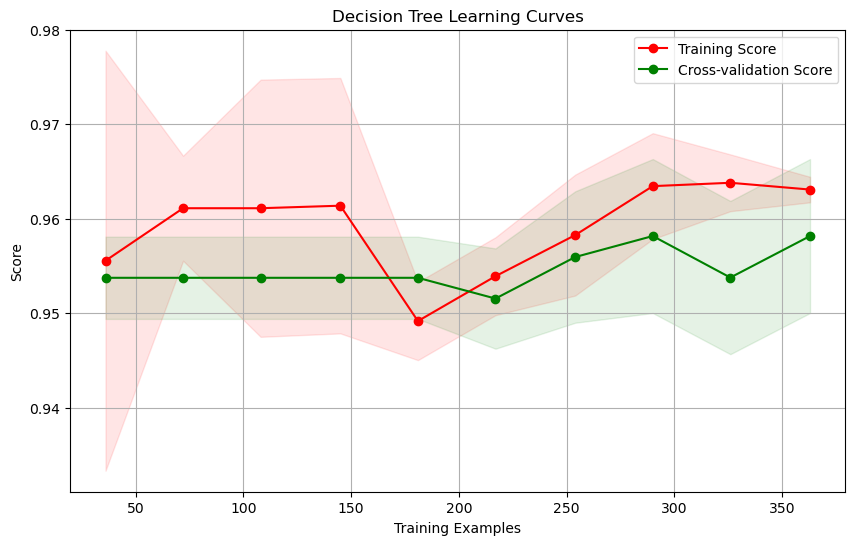

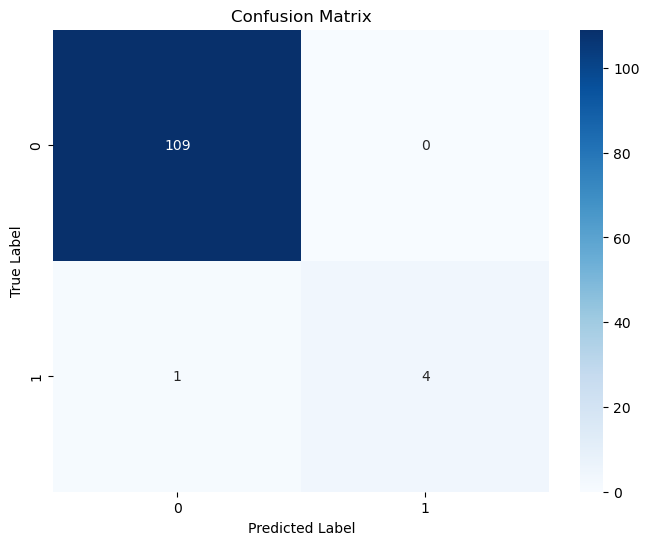

In [4]:
# decision tree
import pandas as pd
import numpy as np
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV with the correct delimiter
data = pd.read_csv('C:/Users/jkgas/OneDrive/Documents/GitHub/G/for_classifier.csv', delimiter=';')

# Extract features and labels
X = data[['color_score', 'symmetry_score', 'blue_white_score']].values
y = data['diagnostic'].values  # Assuming 'diagnostic' column contains the class labels (0 or 1)

# Check class distribution
class_distribution = data['diagnostic'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58, stratify=y)

# Define the classifier pipeline (Decision Tree Classifier) with best hyperparameters
classifier = make_pipeline(
    StandardScaler(), 
    DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2)  # Use DecisionTreeClassifier
)

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Calculate learning curves
train_sizes, train_scores, valid_scores = learning_curve(classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title("Decision Tree Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation Score")

plt.legend(loc="best")

# Generate predictions
y_pred = classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

plt.show()